# Машинное обучение, ФКН ВШЭ

# Практическое задание 1

## Общая информация

Дата выдачи: 16.09.2016

Срок сдачи: 30.09.2016 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на hse.cs.ml+<номер группы>@gmail.com (например, hse.cs.ml+141@gmail.com для студентов группы БПМИ-141).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import math
from sklearn import preprocessing, feature_extraction, cross_validation, linear_model, metrics, feature_extraction
import matplotlib


In [ ]:
import sklearn.

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [10]:
def max_element(arr):
    modified = np.nonzero(a == 0)[0]
    if not len(modified):
        return None
    modified += 1
    if modified[-1] == len(arr):
        modified = modified[:-1]
    return np.amax(arr[modified])


In [2]:
for i in range(1, 6, 2):
    print(i)

1
3
5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [12]:

def nearest_value(X, v):
    Y = X - v
    coordinate = np.argmin(np.absolute(Y))
    return X.flatten()[coordinate]
# DONE

In [13]:
X = np.arange(-10,0).reshape((2, 5))
v = -2.51
print(nearest_value(X, v))

-3


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [14]:
def scale(X):
    stds = X.std(axis=1)
    if len(np.nonzero(stds==0)[0]):
        return "DIVISION BY ZERO!!!"
    means = X.mean(axis=1)
    Y = X - means
    Y /= stds
    return Y

sample_matrix = np.array([np.random.randint(0, 100, 2) for i in range(2)])

print(sample_matrix)
print(scale(sample_matrix))


[[58 43]
 [82 58]]
[[ 1.   -2.25]
 [ 4.2  -1.  ]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [15]:
def get_stats(X):
    print("DET: ", np.linalg.det(X))
    print("TRACE: ", np.trace(X))
    print("MAX: ", X.max())
    print("MIN: ", X.min())
    print("MATRIX NORM: ", np.linalg.norm(X))
    print("EIGENVALS: ", np.linalg.eig(X)[0])
    print("INVERSE: ", np.linalg.inv(X))
    # Your code here
    
X = np.array([np.random.normal(10, 1, 2) for i in range(2)])
print(X)
get_stats(X)

[[ 12.22633628  10.6569353 ]
 [ 12.29863501  10.45754958]]
DET:  -3.20823962068
TRACE:  22.6838858662
MAX:  12.2986350083
MIN:  10.4575495829
MATRIX NORM:  22.8838444142
EIGENVALS:  [ 22.82444741  -0.14056155]
INVERSE:  [[-3.25959118  3.3217392 ]
 [ 3.83345275 -3.81091743]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [16]:
max_vals = np.array([])
for exp_num in range(100):
    X = np.array([np.random.normal(0, 1, 10) for i in range(10)])
    Y = np.array([np.random.normal(0, 1, 10) for i in range(10)])
    max_vals = np.append(max_vals, [np.dot(X, Y).max()])

print("MEAN: ", max_vals.mean())
print("95% quantile: ", np.percentile(max_vals, 95))
    

MEAN:  8.20189377787
95% quantile:  11.8869156564


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [1]:
import pandas as pd
%matplotlib inline

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [10]:
pass_data = pd.read_csv('2008.csv')

In [11]:
grouped = pass_data.groupby("CancellationCode")
grouped.sum()["Cancelled"]

CancellationCode
A    563
B    549
C    299
Name: Cancelled, dtype: int64

ответ "carrier"

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [12]:
print("MAX = ", pass_data["Distance"].max())
print("MIN = ", pass_data["Distance"].min())
print("MEAN = ", pass_data["Distance"].mean())

MAX =  4962
MIN =  31
MEAN =  724.5082571428571


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

Нет, не выглядит. Наш патриарх чтоб двести метров пройти в машину садится. А тут 31 миля. Я уже ничему не удивляюсь.

In [13]:
susp_flight_info = pass_data[pass_data.Distance == 31][["FlightNum", "Month", "DayofMonth"]]
susp_flight_nums = susp_flight_info["FlightNum"].unique()
print("Подозрительные:")
print(susp_flight_info, "\n")
print("Они же в другие дни:")
for flight in susp_flight_nums:
        print("FLIGHT # ", flight, "\n", pass_data[(pass_data['FlightNum'] == susp_flight_nums[1]) &
                                                                   (pass_data['Distance'] != 31)][['Distance', 'Month', 'DayofMonth']], "\n")

Подозрительные:
       FlightNum  Month  DayofMonth
1116          65     12          30
6958          65     12          26
17349         64      8          18
27534         64      3          11
46082         65      8           9
48112         64      2          28 

Они же в другие дни:
FLIGHT #  65 
        Distance  Month  DayofMonth
501         533      3          20
1389        680      3          13
2619       2381      5          23
3869         82      7           1
4025       1005      6          15
4466        123      6          29
6778        359      7          12
7891       2381      4           6
7977       1747      7           9
8448        123      2          10
9615        533      1           4
10833       372      3          31
12352      1747      1          14
12980        82      8           6
13155      1747      7           2
21304      1005      5          13
24750       680      8          21
25671       533      1          15
26323      1005     12       

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [14]:
IATA_code = pass_data.groupby('Origin').size().argmax()
airports = pd.read_csv('airports.csv') # http://stat-computing.org/dataexpo/2009/supplemental-data.html
print(IATA_code, "находится в городе ", airports[airports['iata'] == IATA_code]['city'].values)

ATL находится в городе  ['Atlanta']


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [15]:
time_mean = pass_data[['Origin', 'AirTime' ]].groupby('Origin').mean()
print("Аэропорт с интентификатором ", time_mean['AirTime'].argmax())

Аэропорт с интентификатором  SJU


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [22]:
all_airports = pass_data[pass_data['Cancelled'] != 1][['Origin', 'DepDelay']].groupby('Origin').filter(lambda x: len(x) > 1000)
delays_in_airports = all_airports[all_airports['DepDelay'] > 0].groupby('Origin')
# print(delays_in_airports.size())
dell_aip = np.array(delays_in_airports.size())
all_aip = np.array(all_airports.groupby('Origin').size())
id_max_in_parts = (dell_aip / all_aip).argmax()
print(all_airports.groupby('Origin').size(), "\nэто аэропорт #", id_max_in_parts + 1)

Origin
ATL    1738
BOS     376
BWI     467
CLT     498
DEN    1063
DFW    1283
DTW     569
EWR     710
IAH     841
JFK     444
LAS     779
LAX     859
LGA     358
MCO     537
MSP     459
ORD    1649
PHL     432
PHX     858
SEA     495
SFO     557
SLC     424
dtype: int64
Origin
ATL    4078
BOS    1128
BWI    1018
CLT    1229
DEN    2353
DFW    2730
DTW    1588
EWR    1343
IAH    1770
JFK    1172
LAS    1773
LAX    2063
LGA    1114
MCO    1324
MSP    1233
ORD    3391
PHL    1007
PHX    2010
SEA    1114
SFO    1371
SLC    1313
dtype: int64 
это аэропорт # 8


EWR вообщем

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [164]:
pass_data = pd.read_csv('2008.csv')
print("Пропущенные значения имеются:", pass_data.isnull().values.any())
print("В таблице объект-признак пропущено", pass_data.isnull().values.sum(), "значений")
print(np.count_nonzero(np.array(pass_data.isnull().values.sum(axis=1))), "объектов имеют хотя бы 1 пропуск")
print(np.count_nonzero(np.array(pass_data.isnull().values.sum(axis=0))), "признаков имеют хотя бы 1 пропуск")


Пропущенные значения имеются: True
В таблице объект-признак пропущено 355215 значений
70000 объектов имеют хотя бы 1 пропуск
16 признаков имеют хотя бы 1 пропуск


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной? **ДА**
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [165]:
pass_data = pass_data[(~pass_data['DepDelay'].isnull())]
pass_data = pass_data[(pass_data['DepDelay'] != 0)]
pass_data = pass_data.reset_index()
pass_data = pass_data.drop('index', 1)
pass_data = pass_data.drop('Cancelled', 1)
pass_data = pass_data.drop('CancellationCode', 1)


**Важно** В задании 15 функция transform_data() должна на выходе выполнить pd.concat() матрицы X и её закодированных категориальных признаков. Мой комп не может в такую операцию, какая-то проблема с RAM (Видимо ее не достаточно, python говорит memory error). Я не исключаю того что мог накосячить в самой функции, и обработать данные как-то криво, однако, разные эксперименты не подтвердили этого факта. Вообщем, дальше я буду действовать со случайным сэмплом из 10000 объектов, чтобы не терять зря время.

In [166]:
# pass_data.corr()

In [167]:
#это можно убрать и игнорировать написанное выше.
pass_data = pass_data[35000:45000]   #можно sample(10000) однако мои коментарии тогда не сработают=\[]
pass_data = pass_data.reset_index()
pass_data = pass_data.drop('index', 1)

In [168]:
Y = pass_data['DepDelay']
pass_data = pass_data.drop('DepDelay', 1)
# Y.head()

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [169]:
def get_hour(timeval):
    if math.isnan(timeval): 
        return np.nan
    else:
        str_hour = str(int(timeval))[:-2]
        if str_hour == '':
            return np.nan # аномальное время вылета(hhmm записано двухзначно)
        else:
            return int(str(int(timeval))[:-2])
    

def get_min(timeval):
    if math.isnan(timeval): 
        return np.nan
    else:
        
        str_timeval = str(int(timeval))
#         print(str_timeval[len(str_timeval) - 2:])
        return int(str_timeval[len(str_timeval) - 2:])


def split_time_features(column_name, pass_data):
#     print(column_name)
    hours = pass_data[column_name].apply(get_hour)
    mins = pass_data[column_name].apply(get_min)
    pass_data[column_name + '_Hour'] = hours
    pass_data[column_name + '_Minute'] = mins
    pass_data = pass_data.drop(column_name, 1)
    return pass_data


pass_data = split_time_features('DepTime', pass_data)
pass_data = split_time_features('CRSDepTime', pass_data)
pass_data = split_time_features('ArrTime', pass_data)
pass_data = split_time_features('CRSArrTime', pass_data)
    


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [170]:
# Исключены по заданию
pass_data = pass_data.drop(['TailNum', 'Year'], 1)
# Исключены потому что во многих случаях полностью составляют целевую переменную (суммарно и с пересечениями) и имеют много пропусков. 
pass_data = pass_data.drop(['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'] , 1)

pass_data = pass_data.drop('ArrDelay', 1) #вообще тут кореляция очень большая 0.93 с depdelay (изучал результат corr())


pd.options.display.max_columns = 100
# pass_data


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [171]:
pass_data[['Distance', 'Diverted', 'DepTime_Minute', 'CRSDepTime_Minute', 'CRSArrTime_Minute']] = pass_data[['Distance', 'Diverted', 'DepTime_Minute', 'CRSDepTime_Minute', 'CRSArrTime_Minute']].astype(float)
pass_data[['Month', 'DayofMonth', 'DayOfWeek', 'FlightNum']] = pass_data[['Month', 'DayofMonth', 'DayOfWeek', 'FlightNum']].astype(object)

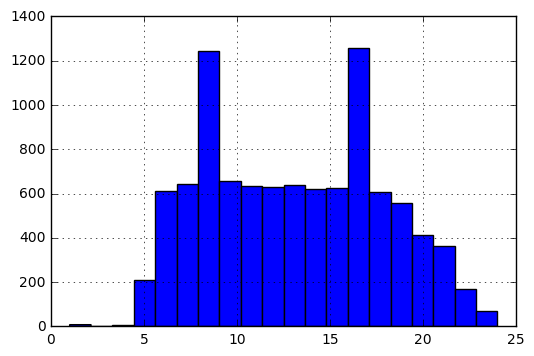

In [172]:
X = pass_data
X['DepTime_Hour'].hist(bins=20)

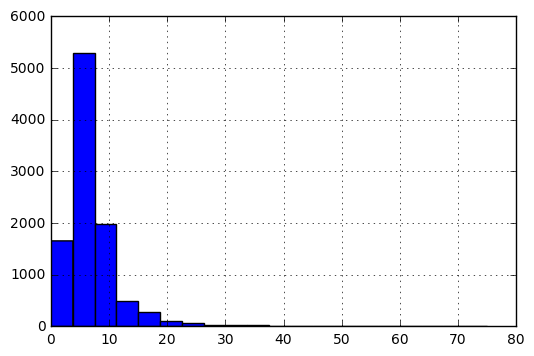

In [173]:
X['TaxiIn'].hist(bins=20)

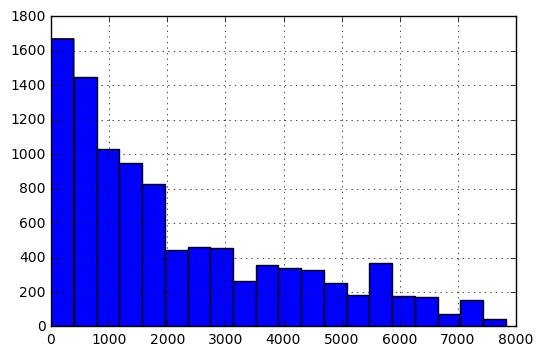

In [174]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [175]:
def transform_data(data):
    data_features_mask = (data.dtypes == 'object').values #objects
    label_enc = preprocessing.LabelEncoder()
    for feature in data.columns[data_features_mask]:
        data[feature] = data[feature].fillna('nan')
        data[feature] = label_enc.fit_transform(data[feature])
        
    OneHot = preprocessing.OneHotEncoder(sparse=False)
    data_np = OneHot.fit_transform(data[data.columns[data_features_mask]])
    data_pd = pd.DataFrame(data=data_np)
        
    for feature in data.columns[data_features_mask]:
        data = data.drop(feature, 1)

    data_features_mask = (data.dtypes == 'float64').values #floats
    for feature in data.columns[data_features_mask]:
        data[feature] = data[feature].fillna(0)
        data[feature] = preprocessing.StandardScaler().fit_transform(data[feature].reshape(-1,1))
    
    return pd.concat([data, data_pd], axis=1)
            
    
    # Your code here

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [176]:
X = transform_data(X)
print(X.columns.size, "признаков")


4982 признаков


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [177]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.3, random_state=17)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [111]:
Regr_model = linear_model.LinearRegression().fit(X_train[3000:4000], Y_train[3000:4000])
# print(Regr_model.coef_)
Train_prediction = Regr_model.predict(X_train[3000:4000])
Test_prediction = Regr_model.predict(X_test)
print(metrics.mean_squared_error(Y_train[3000:4000], Train_prediction), metrics.r2_score(Y_train[3000:4000], Train_prediction))
print(metrics.mean_squared_error(Y_test, Test_prediction), metrics.r2_score(Y_test, Test_prediction))


6.19728874114e-25 1.0
4597.00570941 -2.39236052903


In [112]:
# np.set_printoptions(threshold=np.nan)
# print(Regr_model.coef_)


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [113]:
Lasso_model = linear_model.LassoCV(cv=5, n_alphas=10, n_jobs=2, max_iter=200000)
Lasso_model.fit(X_train[3000:4000], Y_train[3000:4000])
# print(Lasso_model.mse_path_)
# print(np.array(Lasso_model.mse_path_).mean(axis=1))

# print(Lasso_model.alphas_)
Train_prediction = Lasso_model.predict(X_train[3000:4000])
Test_prediction = Lasso_model.predict(X_test)
print(metrics.mean_squared_error(Y_train[3000:4000], Train_prediction), metrics.r2_score(Y_train[3000:4000], Train_prediction))
print(metrics.mean_squared_error(Y_test, Test_prediction), metrics.r2_score(Y_test, Test_prediction))

841.130743012 0.119304730065
1270.20411544 0.062652827203


In [114]:
Ridge_model = linear_model.RidgeCV(cv=5)
Ridge_model.fit(X_train[3000:4000], Y_train[3000:4000])
# print(Lasso_model.mse_path_)
# print(np.array(Lasso_model.mse_path_).mean(axis=1))

# print(Lasso_model.alphas_)
Train_prediction = Ridge_model.predict(X_train[3000:4000])
Test_prediction = Ridge_model.predict(X_test)
print(metrics.mean_squared_error(Y_train[3000:4000], Train_prediction), metrics.r2_score(Y_train[3000:4000], Train_prediction))
print(metrics.mean_squared_error(Y_test, Test_prediction), metrics.r2_score(Y_test, Test_prediction))

519.68356929 0.455871913922
1196.43482555 0.117090877344


In [96]:
# print(Lasso_model.coef_)
# Решить проблему весов удалось, так как мы штрафовали модель за большую норму вектора весов. Веса многих признаков обнулились.
# результаты на тестах подросли, кореляция приблизилась к единице, хотя попрежнему очень мала. MSE уменьшилась в ~4 Рааза.


### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0.5 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [178]:
X_train_for_regr = X_train
X_test_for_regr = X_test
X_train = X_train.assign(bias = 1)
X_test = X_test.assign(bias = 1)

**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [179]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return X.dot(w)
#     pass

In [180]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    l = y.shape[0]
    return np.sum(((y - make_pred(X, w)) / y) ** 2) / l
#     pass

In [181]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    l = y.shape[0]
    return (2 * (X.T.dot(X).dot(w) - X.T.dot(y)) / (y.T.dot(y))) / l

In [182]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    return get_func(w, X, y) + (w.T.dot(w)) ** 2

In [183]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    return get_grad(w, X, y) + 2 * w    

**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [184]:
def grad_descent(X, y, w0, step_size, max_iter, eps, is_reg):
    Q_vals = []
    w_k = w0
    w_kp1 = w0
    for i in range(max_iter):
        w_k = w_kp1
        w_kp1 = w_k - step_size * (get_reg_grad(w_k, X, y) if is_reg else get_grad(w_k, X, y))
        Q_vals.append(get_reg_func(w_kp1, X, y) if is_reg else get_func(w_kp1, X, y))
        if np.linalg.norm(w_k - w_kp1) < eps: break
    return w_kp1, Q_vals
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [185]:
w = np.array(np.random.randint(-100, 100, X_train.shape[1]))
iters_count = 10 # Можно поменять на 500-1000 тогда сходимость будет нагляднее. Но впринципе и так ясно где круче наклон кривой

In [123]:
w_res_1, Q_vals_1 = grad_descent(X_train, Y_train, w, step_size=0.001, max_iter=iters_count, eps=0.000001, is_reg=False)
w_res_2, Q_vals_2 = grad_descent(X_train, Y_train, w, step_size=1, max_iter=iters_count, eps=0.000001, is_reg=False)
w_res_3, Q_vals_3 = grad_descent(X_train, Y_train, w, step_size=10, max_iter=iters_count, eps=0.000001, is_reg=False)

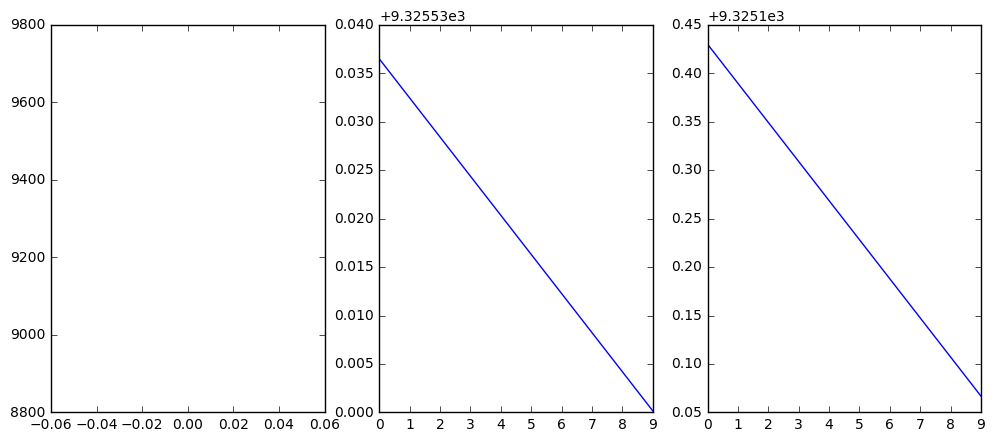

In [124]:
matplotlib.pyplot.figure(figsize=(12, 5))
matplotlib.pyplot.subplot(131)
matplotlib.pyplot.plot([i for i in range(len(Q_vals_1))], Q_vals_1, label="data1") #blue
matplotlib.pyplot.legend = "sdsd"
matplotlib.pyplot.subplot(132)
matplotlib.pyplot.plot([i for i in range(len(Q_vals_2))], Q_vals_2) #green
matplotlib.pyplot.legend = "sdsd"
matplotlib.pyplot.subplot(133)
matplotlib.pyplot.plot([i for i in range(len(Q_vals_3))], Q_vals_3) #red

Судя по графикам выбор шага значительно влияет на скорость сходимости. Например 0.001 очень мало, сходится медленно. 1 и 10 соизмеримы по скорости, можно получить хороший результат даже за 10 итераций (но 1 лучше, сходимость от итераций быстрее).

In [128]:
w_0 = np.array([0 for i in range(X_train.shape[1])])
w_res_zeros_like_3, Q_vals_zeros_like_3 = grad_descent(X_train, Y_train, w_0, step_size=1, max_iter=iters_count, eps=0.000001, is_reg=False)

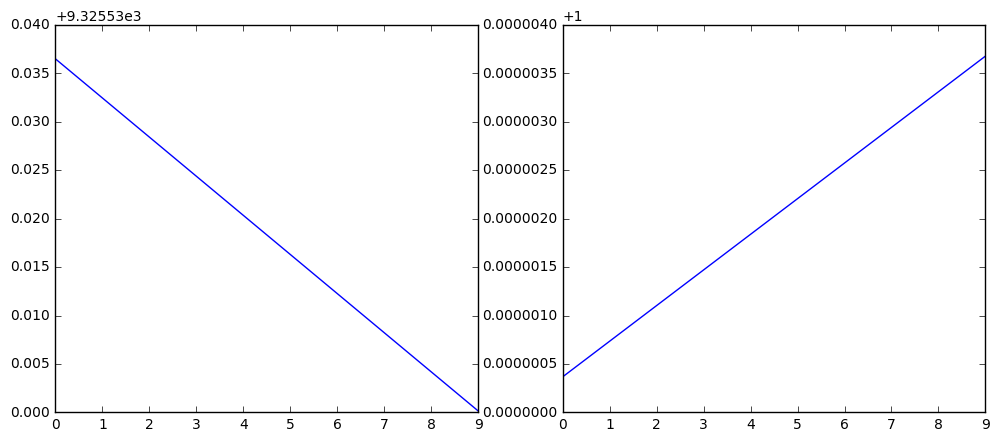

In [129]:
matplotlib.pyplot.figure(figsize=(12, 5))
matplotlib.pyplot.subplot(121)
matplotlib.pyplot.plot([i for i in range(len(Q_vals_2))], Q_vals_2, label="data1") #blue
matplotlib.pyplot.legend = "sdsd"
matplotlib.pyplot.subplot(122)
matplotlib.pyplot.plot([i for i in range(len(Q_vals_zeros_like_3))], Q_vals_zeros_like_3) #green

С нулей спуск работает хуже. Тоесть он вообще расходится в ряде случаев. Все зависит от того насколько близко к минимуму находится точка 0(получислось что мы перескочили минимум). На данных графиках получилось что сходимость лучше у случайных чисел.

**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [130]:
# w = np.array(np.random.randint(-2, 2, X_train.shape[1]))
w = np.array(np.random.randint(-100, 100, X_train.shape[1]))

w_res_1, Q_vals_1 = grad_descent(X_train, Y_train, w, step_size=0.001, max_iter=10, eps=0.000001, is_reg=False)
w_res_2, Q_vals_2 = grad_descent(X_train, Y_train, w, step_size=0.001, max_iter=10, eps=0.000001, is_reg=True)

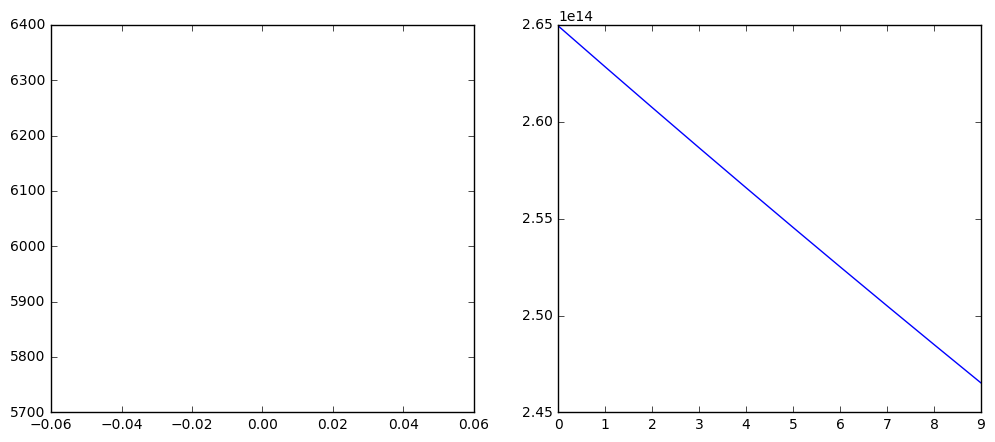

In [131]:
matplotlib.pyplot.figure(figsize=(12, 5))
matplotlib.pyplot.subplot(121)
matplotlib.pyplot.plot([i for i in range(len(Q_vals_1))], Q_vals_1, label="data1") #blue
matplotlib.pyplot.legend = "sdsd"
matplotlib.pyplot.subplot(122)
matplotlib.pyplot.plot([i for i in range(len(Q_vals_2))], Q_vals_2) #green

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [161]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad_for_sgd(w, X, y):
#     print(w.shape, X.shape, y.shape)
    return 2 * (X.T.dot(X) * w - X.T * y) / (y * y) # l = 1

def get_reg_grad_for_sgd(w, X, y):
    return get_grad_for_sgd(w, X, y) + 2 * w
    

In [162]:
def sgd(X, y, w0, step_size, max_iter, eps, is_reg):
    Q_vals = []
    w_k = w0
    w_kp1 = w0
    for i in range(max_iter):
        x_idx = X.sample(1)
        w_k = w_kp1
        print(get_grad_for_sgd(w_k, X.loc[x_idx.index], y.loc[x_idx.index]).shape)
        w_kp1 = w_k - step_size * (get_reg_grad_for_sgd(w_k, X.loc[x_idx.index], y.loc[x_idx.index]) if is_reg else get_grad_for_sgd(w_k, X.loc[x_idx.index], y.loc[x_idx.index]))
        Q_vals.append(get_reg_func(w_kp1, X.loc[x_idx.index], y.loc[x_idx.index]) if is_reg else get_func(w_kp1, X.loc[x_idx.index], y.loc[x_idx.index]))
        if np.linalg.norm(w_k - w_kp1) < eps: break
    return w_kp1, Q_vals
    # Your code here

In [163]:
w = np.array(np.random.randint(-100, 100, X_train.shape[1]))
print(w.shape)
w_res_2, Q_vals_2 = sgd(X_train, Y_train, w, step_size=10, max_iter=iters_count, eps=0.001, is_reg=False)

(4983,)


/home/wamkelekile/Storage/anaconda3/lib/python3.5/site-packages/pandas/indexes/base.py:2482: RuntimeWarning: unorderable types: str() > int(), sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


(4983, 4983)
(4983, 4983)
(4983, 4983)
(4983, 4983)


/home/wamkelekile/Storage/anaconda3/lib/python3.5/site-packages/pandas/indexes/base.py:2482: RuntimeWarning: unorderable types: str() < int(), sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)
/home/wamkelekile/Storage/anaconda3/lib/python3.5/site-packages/pandas/indexes/base.py:2482: RuntimeWarning: unorderable types: int() > str(), sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


(4983, 4984)


/home/wamkelekile/Storage/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:4205: RuntimeWarning: unorderable types: str() < int(), sort order is undefined for incomparable objects
  other.columns, how=join, level=level, return_indexers=True)


(4983, 4985)
(4983, 4986)
(4983, 4986)
(4983, 4987)
(4983, 4987)


дедлайны

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

не получается подобрать шаг, метод расходится очень быстро.

**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [132]:
Regr_model = linear_model.LinearRegression().fit(X_train_for_regr, Y_train) 


In [133]:
# print(Regr_model.coef_)
print(get_func(Regr_model.coef_, X_test_for_regr, Y_test)) # MSPE модели обученной на MSE

1.7482782754249858e+25


In [137]:
w = np.array(np.random.randint(-100, 100, X_train.shape[1]))
w_res_1, Q_vals_1 = grad_descent(X_train, Y_train, w, step_size=1, max_iter=iters_count, eps=0.000001, is_reg=False)
print(get_func(w_res_1, X_test, Y_test)) # MSPE которое было в п 22 

8432.453857877783


Здесь вы можете поделиться своими мыслями по поводу этого задания.

Вообще, я умаялся.

А здесь — вставить вашу любимую картинку.

![](https://s-media-cache-ak0.pinimg.com/originals/7b/02/86/7b028635a5c7db2796111ce67ee8fcb0.png)